### INFO 370 Lab: Explore and clean data
#### Name: Gabriella Rivera

In [1]:
import pandas as pd
import numpy as np

#### 1. Load, pre-process

1.

In [3]:
df = pd.read_csv('nycflights13.csv.bz2', sep="\t")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [6]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


2.

In [5]:
for col in df.columns:
    print(col)

year
month
day
dep_time
sched_dep_time
dep_delay
arr_time
sched_arr_time
arr_delay
carrier
flight
tailnum
origin
dest
air_time
distance
hour
minute
time_hour


3.

In [8]:
subset = df[['month', 'day', 'arr_time', 'arr_delay', 'dep_time', 'dep_delay', 'dest', 'carrier', 'air_time']]
print(subset)

,month,day,arr_time,arr_delay,dep_time,dep_delay,dest,carrier,air_time
0,1,1,830.0,11.0,517.0,2.0,IAH,UA,227.0
1,1,1,850.0,20.0,533.0,4.0,IAH,UA,227.0
2,1,1,923.0,33.0,542.0,2.0,MIA,AA,160.0
3,1,1,1004.0,-18.0,544.0,-1.0,BQN,B6,183.0
4,1,1,812.0,-25.0,554.0,-6.0,ATL,DL,116.0
...,...,...,...,...,...,...,...,...,...
336771,9,30,NaN,NaN,NaN,NaN,DCA,9E,NaN
336772,9,30,NaN,NaN,NaN,NaN,SYR,9E,NaN
336773,9,30,NaN,NaN,NaN,NaN,BNA,MQ,NaN
336774,9,30,NaN,NaN,NaN,NaN,CLE,MQ,NaN


4.

In [14]:
for col in subset.columns:
    missing = subset[col].isna().sum()
    print(col, missing)

month 0
day 0
arr_time 8713
arr_delay 9430
dep_time 8255
dep_delay 8255
dest 0
carrier 0
air_time 9430


#### 2 Missing Time

1.

In [36]:
missing_dep = subset[subset.arr_time.notnull() & subset.dep_time.isnull()]                 
missing_dep_count = len(missing_dep.index)
print(missing_dep_count)
print(missing_dep)

0
Empty DataFrame
Columns: [month, day, arr_time, arr_delay, dep_time, dep_delay, dest, carrier, air_time]
Index: []


2.

In [40]:
missing_arr = subset[subset.dep_time.notnull() & subset.arr_time.isnull()]         
missing_arr_count = len(missing_arr.index)
print(missing_arr_count)
missing_arr

458


,month,day,arr_time,arr_delay,dep_time,dep_delay,dest,carrier,air_time
754,1,1,NaN,NaN,2016.0,46.0,OKC,EV,NaN
1714,1,2,NaN,NaN,2041.0,-4.0,RSW,B6,NaN
1756,1,2,NaN,NaN,2145.0,16.0,RSW,UA,NaN
7039,1,9,NaN,NaN,615.0,0.0,ATL,9E,NaN
7851,1,9,NaN,NaN,2042.0,2.0,LAX,B6,NaN
...,...,...,...,...,...,...,...,...,...
328710,9,22,NaN,NaN,1244.0,29.0,MSP,MQ,NaN
330305,9,24,NaN,NaN,623.0,-2.0,RDU,MQ,NaN
330418,9,24,NaN,NaN,800.0,0.0,ORD,UA,NaN
334177,9,27,NaN,NaN,2253.0,188.0,GSO,EV,NaN


3.  I can't seem to spot any patterns in terms of date, time, airline, destination, or anyting else. 

#### 3. Delays

1.

In [42]:
austin_df = df[df.dest == 'AUS']
austin_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
173,2013,1,1,905.0,905,0.0,1309.0,1229,40.0,B6,1061,N281JB,JFK,AUS,263.0,1521,9,5,2013-01-01T14:00:00Z
439,2013,1,1,1456.0,1455,1.0,1830.0,1813,17.0,UA,1134,N24212,EWR,AUS,252.0,1504,14,55,2013-01-01T19:00:00Z
568,2013,1,1,1654.0,1700,-6.0,2020.0,2034,-14.0,DL,706,N320NB,JFK,AUS,251.0,1521,17,0,2013-01-01T22:00:00Z
577,2013,1,1,1701.0,1710,-9.0,2026.0,2015,11.0,AA,695,N3FUAA,JFK,AUS,247.0,1521,17,10,2013-01-01T22:00:00Z
760,2013,1,1,2021.0,2025,-4.0,2351.0,2341,10.0,B6,1069,N203JB,JFK,AUS,255.0,1521,20,25,2013-01-02T01:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,2013,9,30,1504.0,1510,-6.0,1738.0,1812,-34.0,UA,1483,N73256,EWR,AUS,184.0,1504,15,10,2013-09-30T19:00:00Z
336425,2013,9,30,1606.0,1605,1.0,1844.0,1918,-34.0,DL,706,N389DA,JFK,AUS,186.0,1521,16,5,2013-09-30T20:00:00Z
336510,2013,9,30,1720.0,1720,0.0,1944.0,2030,-46.0,AA,291,N3LBAA,JFK,AUS,184.0,1521,17,20,2013-09-30T21:00:00Z
336714,2013,9,30,2035.0,2029,6.0,2318.0,2337,-19.0,UA,1039,N78524,EWR,AUS,191.0,1504,20,29,2013-10-01T00:00:00Z


2.

In [79]:
avg_arr_delay = austin_df.groupby('carrier').mean('arr_delay')
# top_5_arr_delay = avg_arr_delay.nlargest(5, 'arr_delay')  <-- alternative solution
sorted = avg_arr_delay.sort_values(by='arr_delay', ascending=False)
top_5 = sorted.head()
print(top_5)

           year     month        day     dep_time  sched_dep_time  dep_delay  \
carrier                                                                        
AA       2013.0  6.526027  15.720548  1741.069638     1716.945205  15.247911   
B6       2013.0  6.445783  15.601071  1466.495968     1457.211513  14.939516   
UA       2013.0  5.946269  15.528358  1627.063253     1602.565672  14.915663   
DL       2013.0  6.638655  15.806723  1661.107345     1650.924370  10.824859   
9E       2013.0  2.000000   2.000000  1694.000000     1655.000000  19.000000   

            arr_time  sched_arr_time  arr_delay       flight    air_time  \
carrier                                                                    
AA       2023.938719     2024.794521  16.209497   562.178082  215.067039   
B6       1301.461022     1771.710843  11.692722  1053.530120  213.846361   
UA       1702.882530     1890.644776   4.277108   974.655224  211.275602   
DL       1963.730878     1983.092437   1.409091   771.05042

3.

In [86]:
date_merged = (1000000 * austin_df.month) + (10000 * austin_df.day) + austin_df.dep_time
austin_df.loc[:, 'date_merged'] = date_merged
austin_df
last_flight_to_aus = austin_df.groupby('carrier').max('date_merged')
print(last_flight_to_aus)

         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
carrier                                                                    
9E       2013      2    3    1739.0            1655       44.0    2054.0   
AA       2013     12   31    2123.0            1720      243.0    2351.0   
B6       2013     12   31    2349.0            2054      247.0    2400.0   
DL       2013     12   31    2229.0            1700      334.0    2338.0   
UA       2013     12   31    2356.0            2159      351.0    2359.0   
WN       2013     12   31    1401.0            1325      190.0    1751.0   

         sched_arr_time  arr_delay  flight  air_time  distance  hour  minute  \
carrier                                                                        
9E                 2029       25.0    3369     225.0      1521    16      55   
AA                 2035      260.0     695     272.0      1521    17      20   
B6                 2359      250.0    1295     301.0      1521    20   

4.

,carrier,dep_delay,arr_delay
0,9E,19.000000,-3.500000
1,AA,15.247911,16.209497
2,B6,14.939516,11.692722
3,DL,10.824859,1.409091
4,UA,14.915663,4.277108
5,WN,3.840678,-11.242321


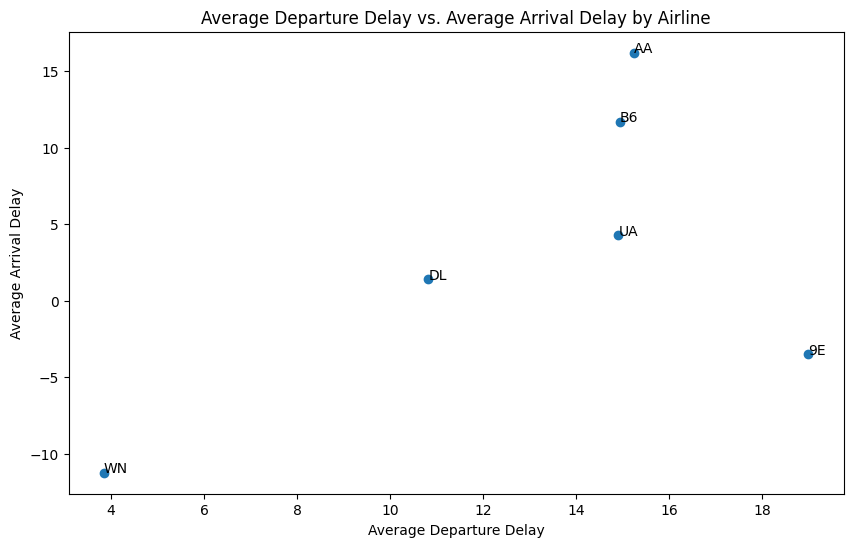

In [113]:
import matplotlib.pyplot as plt

average_delays = austin_df.groupby('carrier')[['dep_delay', 'arr_delay']].mean().reset_index()
display(average_delays)

plt.scatter(average_delays['dep_delay'], average_delays['arr_delay'])

plt.xlabel('Average Departure Delay')
plt.ylabel('Average Arrival Delay')

plt.title('Average Departure Delay vs. Average Arrival Delay by Airline')

# Annotate each point with the carrier code
for i, row in average_delays.iterrows():
    plt.text(row['dep_delay'], row['arr_delay'], row['carrier'])

plt.show()  